In [18]:
# # use python script to take all 3216 gather files and only keep lines with spp of importance
# import pandas as pd

# what spp
# df = pd.read_csv('../data/gather.gtdbmags.0k_99.csv')
# df

In [ ]:
import sys
import pandas as pd
from pathlib import Path

input_path = Path(sys.argv[1])
output_file = sys.argv[2]

targets = [
    "s__Prevotella sp002251295",
    "s__Bariatricus sp004560705",
    "s__Cryptobacteroides sp900546925",
    "s__Lactobacillus amylovorus",
    "s__Escherichia coli",
    "s__Mogibacterium_A kristiansenii",
    "s__Holdemanella porci",
    "s__JALFVM01 sp022787145",
    "s__Floccifex porci",
    "s__UBA2868 sp004552595",
    "s__Sodaliphilus sp004557565",
    "s__Limosilactobacillus reuteri",
    "s__JAFBIX01 sp021531895"
]

pattern = "|".join(targets)
dfs = []

# Check if input is a directory or a single file
if input_path.is_dir():
    csv_files = list(input_path.glob("*.mags_and_gtdb.csv"))
else:
    csv_files = [input_path]

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_filtered = df[df["name"].str.contains(pattern, case=False, na=False)]
    dfs.append(df_filtered)

if dfs:
    pd.concat(dfs, ignore_index=True).drop_duplicates().to_csv(output_file, index=False)
else:
    print("No matching files or rows found.")


In [19]:
df2 = pd.read_csv('../data/251029_corespp.pangdb.gather.csv')
len(df2)

47678

In [29]:
df2['name'] = df2['name'].str.extract(r'(s__.*)$')
df2['name'] = df2['name'].str.replace('^s__', '', regex=True)


In [35]:
counts = df2['name'].value_counts()
counts

name
Escherichia coli                 3213
Lactobacillus amylovorus         3208
Cryptobacteroides sp900546925    3200
UBA2868 sp004552595              3199
JAFBIX01 sp021531895             3198
Mogibacterium_A kristiansenii    3198
Sodaliphilus sp004557565         3198
Bariatricus sp004560705          3189
Prevotella sp002251295           3184
Holdemanella porci               3182
Floccifex porci                  3175
JALFVM01 sp022787145             3165
Limosilactobacillus reuteri_I    3067
Limosilactobacillus reuteri      2876
Limosilactobacillus reuteri_J    1300
Limosilactobacillus reuteri_E     794
Limosilactobacillus reuteri_G     360
Escherichia coli_F                352
Limosilactobacillus reuteri_F     267
Escherichia coli_E                255
Limosilactobacillus reuteri_H      98
Name: count, dtype: int64

In [36]:
core_species = counts[counts > 3000].index.tolist()
len(core_species)

13

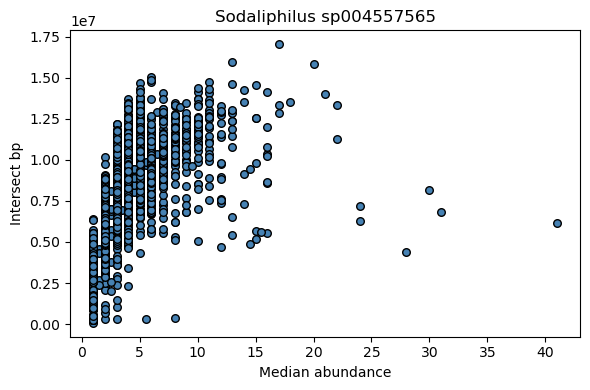

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming df is your dataframe
species = "Sodaliphilus sp004557565"

df_sub = df2[df2["name"] == species]

plt.figure(figsize=(6,4))
plt.scatter(df_sub["median_abund"], df_sub["intersect_bp"], s=30, color="steelblue", edgecolor="k")
plt.xlabel("Median abundance")
plt.ylabel("Intersect bp")
plt.title(species)
plt.tight_layout()
plt.show()


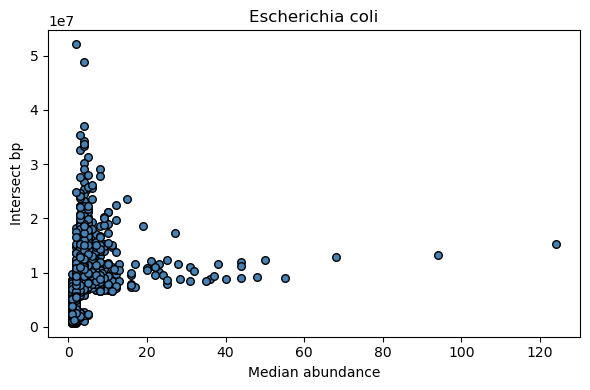

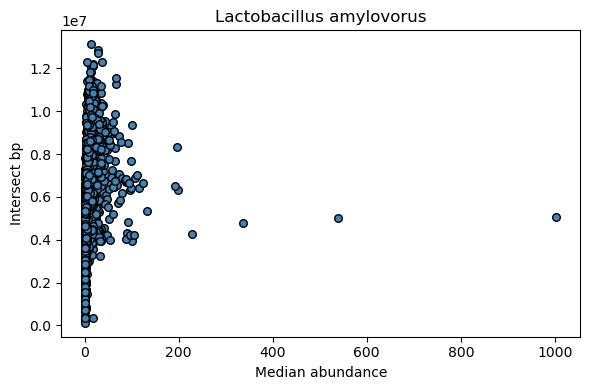

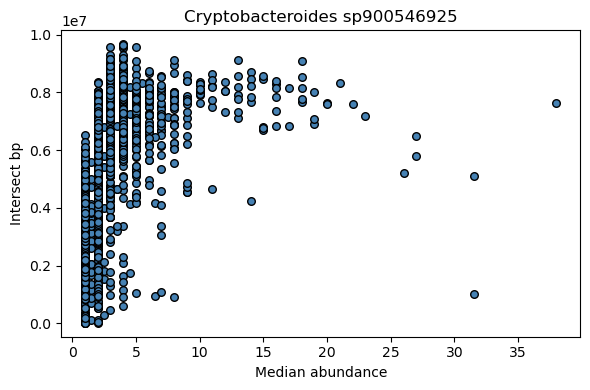

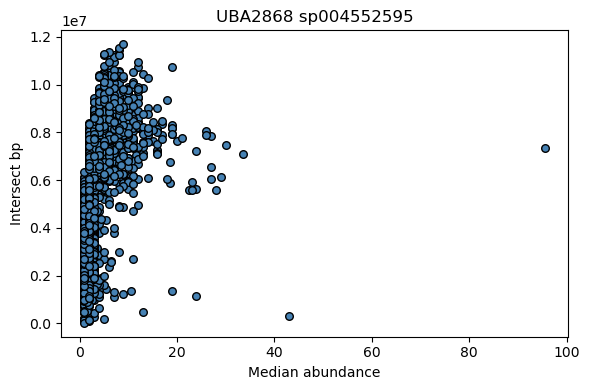

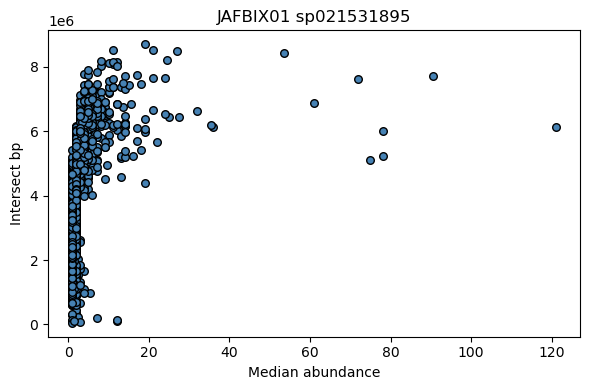

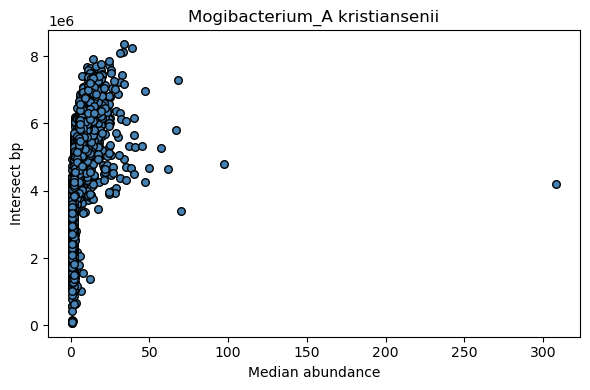

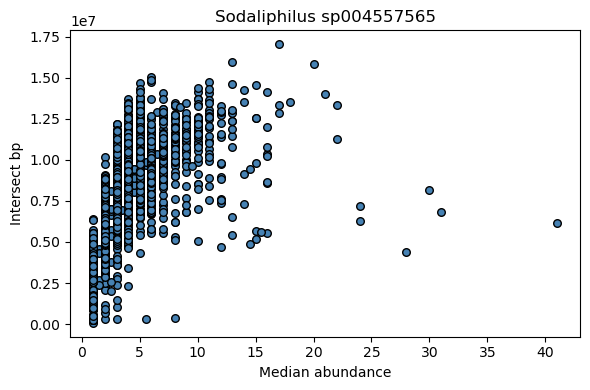

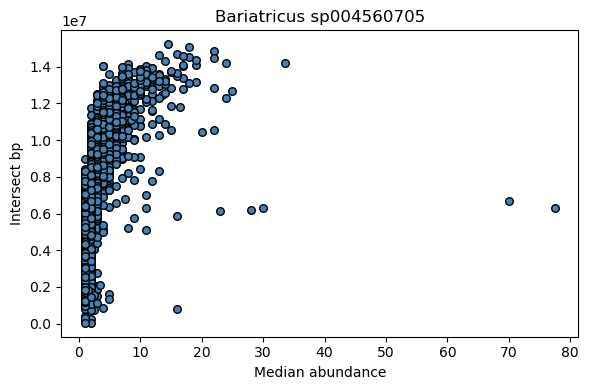

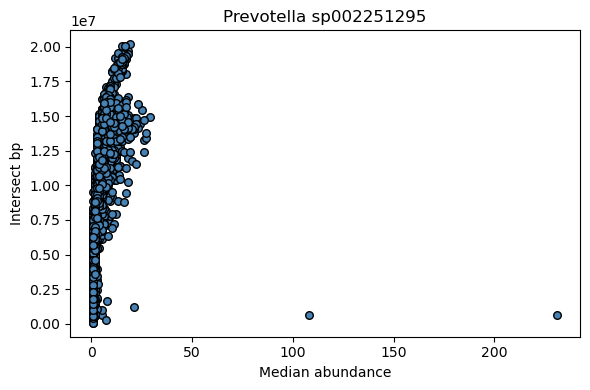

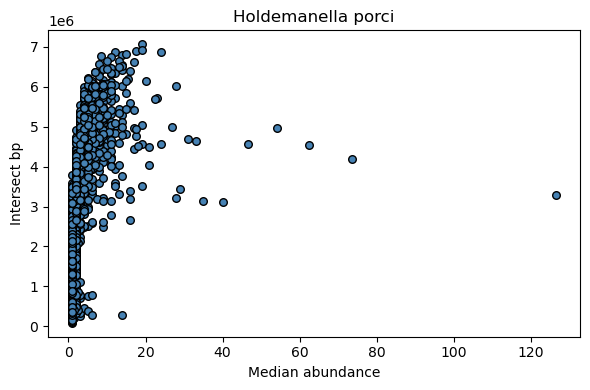

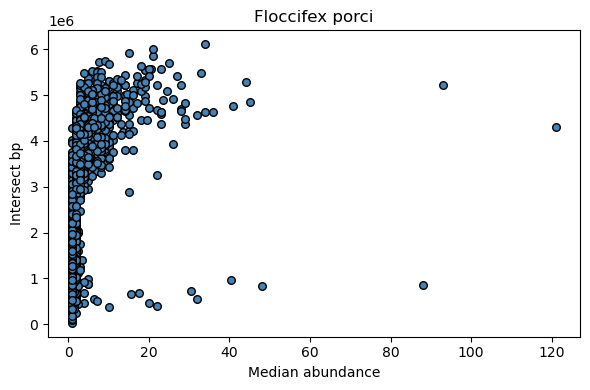

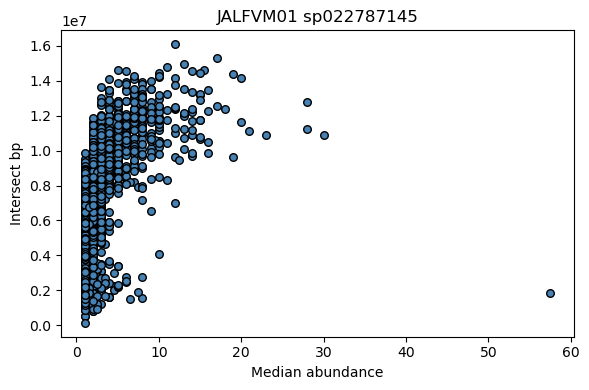

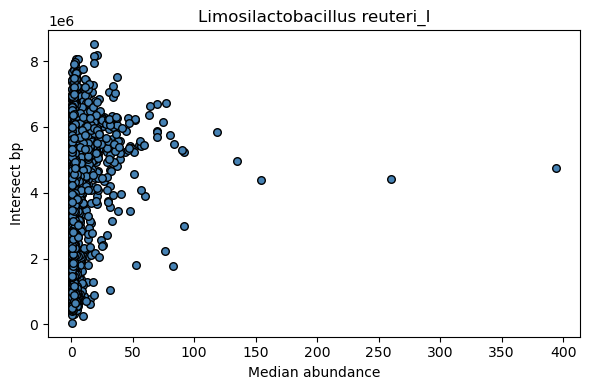

In [39]:
import matplotlib.pyplot as plt


for name in core_species:
    sub = df2[df2["name"] == name]
    plt.figure(figsize=(6,4))
    plt.scatter(sub["median_abund"], sub["intersect_bp"], s=30, color="steelblue", edgecolor="k")
    plt.xlabel("Median abundance")
    plt.ylabel("Intersect bp")
    plt.title(name)
    plt.tight_layout()
    plt.show()
